In [1]:
import silq
silq.initialize('Antimony')

%matplotlib notebook

Initializing imports
Initializing functions
Initializing instruments
Connected to: Agilent Technologies E8267D (serial:SG53400039, firmware:C.06.22) in 0.03s
Initializing parameters
Initializing data
Initializing jupyter
Initializing logging
Initializing slack
Initialization complete


In [2]:
sim_gui(mini=True)

# Setup auto-tune

This sets up the autotune sequence, which can be called by `retune_parameter()`.
This parameter finds the optimal tuning position.

In [3]:
# Calibration parameter
from silq.tests.test_parameters import GaussianParameter, Gaussian2DParameter
from silq.measurements.measurement_modules import MeasurementSequence, ConditionSet
from silq.measurements.measurement_types import Loop0DMeasurement, Loop1DMeasurement, Loop2DMeasurement
from silq.parameters.measurement_parameters import MeasurementSequenceParameter

set_parameters = [TGAC, RDF]
measurements = [
    Loop0DMeasurement('measure_contrast', 
                      acquisition_parameter=EPR_parameter,
                      discriminant='contrast'),
    Loop2DMeasurement('fine_loop_contrast', step_percentage=10, points=7, 
                      acquisition_parameter=EPR_parameter,
                      discriminant='contrast',
                      set_parameters=set_parameters),
    Loop2DMeasurement('coarse_loop_contrast', step_percentage=10, points=15, 
                      acquisition_parameter=EPR_parameter,
                      discriminant='contrast',
                      set_parameters=set_parameters)]

measurement_sequence = MeasurementSequence(
    'retune', measurements=measurements, 
    acquisition_parameter=EPR_parameter,
    condition_sets=[
        ConditionSet(('contrast', '>', 0.25), on_success='success', update=True),
        ConditionSet(('contrast', '>', 0.17), on_success='next_success', update=True)],
    silent=False,
    continuous=True)

retune_parameter = MeasurementSequenceParameter(
    'retune_parameter', 
    measurement_sequence,
    set_parameters=set_parameters)

# DC scans

The measurements below perform different DC scans by sweeping the SIM voltages

## Turnon

Measure turnon by sweeping LB, RB, TG simultaneously

In [9]:
vals = turnon_parameter.sweep(0, 1.4, 0.002)
len(vals)

701

<IPython.core.display.Javascript object>


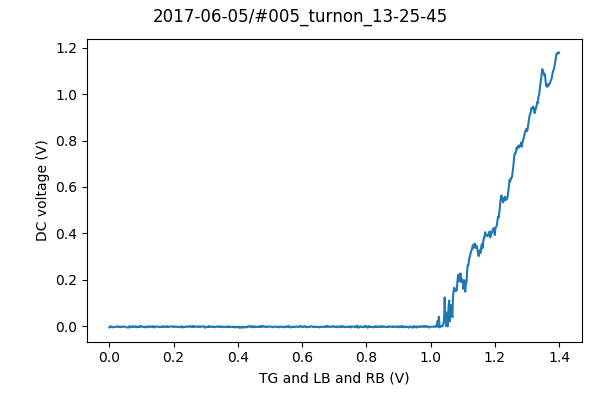

DataSet:
   data = load_data('2017-06-05/#005_turnon_13-25-45')
   <Type>   | <array_id>   | <array.name> | <array.shape>
   Setpoint | TG_LB_RB_set | TG_LB_RB     | (701,)
   Measured | DC_voltage   | DC_voltage   | (701,)
Started at 2017-06-05 13:25:47
Finished at 2017-06-05 13:29:43


In [10]:
DC_parameter.setup()
loop = Loop(vals).each(
    DC_parameter)
data = loop.get_data_set(name='turnon')
plot = loop.plot(data.DC_voltage)
loop.run();

layout.stop()

## Pinchoff

Perform pinchoff of a single barrier

In [ ]:
vals = LB.sweep(1.25, 0, -0.002)
len(vals)

In [ ]:
# Initialize all gates at highest value of barrier
turnon_parameter(vals[0])
DC_parameter.setup()
loop = Loop(vals).each(
    DC_parameter)
data = loop.get_data_set(name=f'pinchoff_{pinchoff_parameter.name}')
plot = loop.plot(data.DC_voltage)

loop.run();

layout.stop()

## 1D DC scan

Perform 1D DC scan

In [21]:
vals = SRC.sweep(-0.3, 0.2, step=0.001)
len(vals)

501

<IPython.core.display.Javascript object>


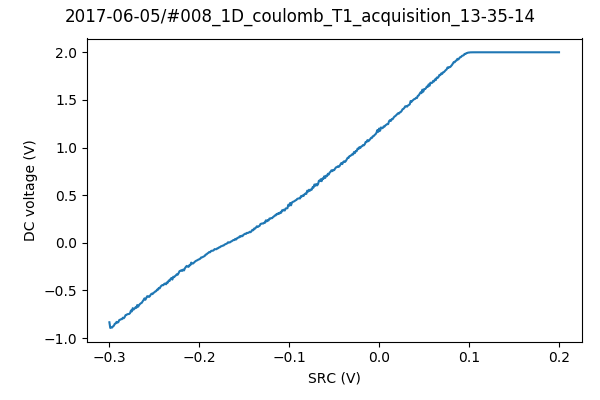

DataSet:
   data = load_data('2017-06-05/#008_1D_coulomb_T1_acquisition_13-35-14')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | SRC_set    | SRC          | (501,)
   Measured | DC_voltage | DC_voltage   | (501,)
Started at 2017-06-05 13:35:16
Finished at 2017-06-05 13:35:55


In [22]:
DC_parameter.setup()
loop = Loop(vals).each(
    DC_parameter)
data = loop.get_data_set(name=f'1D_coulomb_{parameter.name}')
plot = loop.plot(data.DC_voltage)
loop.run();

layout.stop()
vals.parameter(vals[0])

## 2D DC scan

In [48]:
x_vals = TGAC.sweep(-0.5, -0.2, step=0.003)
y_vals = DF.sweep(-0.4, -0.1,  step=0.003)
print(f'Points: X{len(x_vals)} x Y{len(y_vals)}')

Points: X101 x Y101


<IPython.core.display.Javascript object>


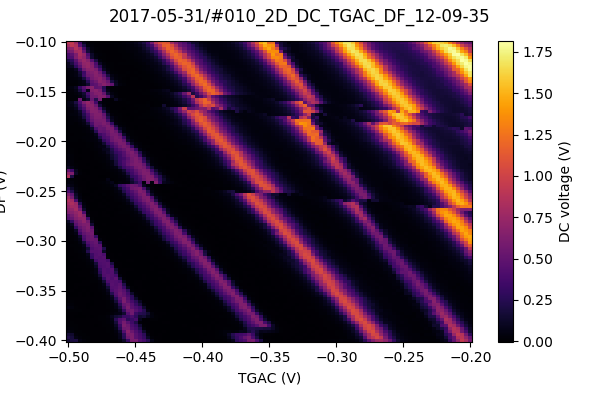

DataSet:
   data = load_data('2017-05-31/#010_2D_DC_TGAC_DF_12-09-35')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | DF_set     | DF           | (101,)
   Setpoint | TGAC_set   | TGAC         | (101, 101)
   Measured | DC_voltage | DC_voltage   | (101, 101)
Started at 2017-05-31 12:09:36
Finished at 2017-05-31 12:52:28


In [49]:
DC_parameter.setup()
loop = Loop(y_vals).loop(
    x_vals).each(
        DC_parameter)
data = loop.get_data_set(name=f'2D_DC_{x_vals.name}_{y_vals.name}')
plot = loop[0].plot(data.DC_voltage)
loop.run()

layout.stop()
# x_vals.parameter(x_vals[0])
# y_vals.parameter(y_vals[0])

In [17]:
x_vals = TGAC.sweep(-0.5, 0, step=0.004)
y_vals = RDF.sweep(-0.2, 0.4,  step=0.004)
print(f'Points: X{len(x_vals)} x Y{len(y_vals)}')

Points: X126 x Y151


In [ ]:
layout.stop()

In [25]:
DS_vals = LDS.sweep(0.45, 0.7, step=0.025)
len(DS_vals)

11

In [24]:
RDS(LDS())

In [27]:
DC_parameter.setup()
loop = Loop(DS_vals).loop(
    y_vals).loop(
        x_vals).each(
            DC_parameter)
data = loop.get_data_set(name=f'3D_DC_{DS_vals.name}_{x_vals.name}_{y_vals.name}')
# plot = loop[0].plot(data.DC_voltage)
loop.run()

layout.stop()
# x_vals.parameter(x_vals[0])
# y_vals.parameter(y_vals[0])

DataSet:
   data = load_data('2017-06-05/#001_3D_DC_LDS_TGAC_RDF_09-50-50')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | LDS_set    | LDS          | (11,)
   Setpoint | RDF_set    | RDF          | (11, 151)
   Setpoint | TGAC_set   | TGAC         | (11, 151, 126)
   Measured | DC_voltage | DC_voltage   | (11, 151, 126)
Started at 2017-06-05 09:50:52
Finished at 2017-06-05 10:20:28


KeyboardInterrupt: 

## Continuous single point scan

Continuously measure DC voltage for fixed gate voltages.
This can be used to check stability of device

In [ ]:
DC_parameter.setup()
loop = Loop(dummy_parameter[0:5000:1], delay=0.2).each(DC_parameter)
data = loop.get_data_set(name='single_point_scan')
plot = loop.plot(data.DC_voltage)
loop.run()

# Variable read

This measurement performs a `plunge - read - empty` sequence while varying the read voltage.
For a donor, this should show a spin tail at sufficient magnetic field.

## Settings

In [4]:
read_pulse = variable_read_parameter.pulse_sequence['read']
read_voltage = parameters.AttributeParameter(read_pulse, attribute='amplitude')

## Scan

<IPython.core.display.Javascript object>


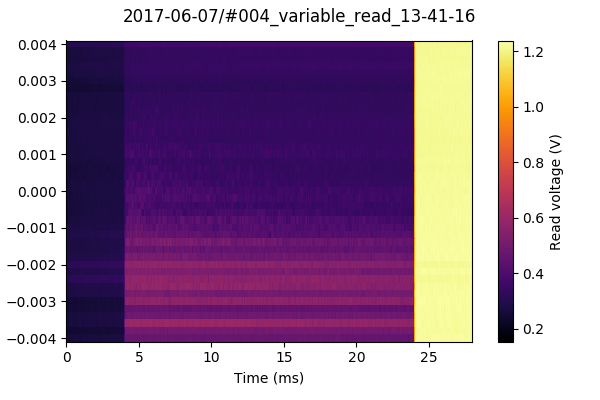

DataSet:
   data = load_data('2017-06-07/#004_variable_read_13-41-16')
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | amplitude_set | amplitude    | (41,)
   Setpoint | time_set      | time         | (41, 14000)
   Measured | read_voltage  | read_voltage | (41, 14000)
Started at 2017-06-07 13:41:18
Finished at 2017-06-07 13:45:26


In [33]:
variable_read_parameter.setup(samples=100)
loop = Loop(read_voltage.sweep(0.004, -0.004, num=41)).each(
    variable_read_parameter)
data = loop.get_data_set(name=f'variable_read')
plot = loop.plot(data.read_voltage)
loop.run();

# Live DC scan

This measurement creates a 2D DC scan that updates continuously.
The plot can be combined with a SIM GUI to quickly tune up the device

## Settings

In [5]:
DC_sweep_parameter.pulse_duration = .05
DC_sweep_parameter.inter_delay = 0
DC_sweep_parameter.trace_pulse.duration = 20
DC_sweep_parameter.pulse_sequence.final_delay = 300

DC_sweep_parameter.trace_pulse.enabled = True
DC_sweep_parameter.use_ramp = True
DC_sweep_parameter.trace_pulse.connection_label = 'TGAC'

DC_sweep_parameter.sweep_parameters.clear()
xrange = 0.15
yrange = 0.15
pts = 80
DC_sweep_parameter.add_sweep('TGAC', np.linspace(-xrange, xrange, pts), 
                             connection_label='TGAC',
                            offset_parameter=TGAC)
DC_sweep_parameter.add_sweep('DF', np.linspace(-yrange, yrange, pts), 
                             connection_label='DF',
                             offset_parameter=RDF)

print(f'pulses: {len(DC_sweep_parameter.pulse_sequence)}')


pulses: 161


## Scan

In [35]:
Measure(DC_sweep_parameter).run(name='DC_Sweep_slow_transition');

DataSet:
   data = load_data('2017-06-07/#005_DC_Sweep_slow_transition_13-46-13')
   <Type>   | <array_id>    | <array.name>  | <array.shape>
   Setpoint | time_set      | time          | (10000,)
   Measured | DC_voltage    | DC_voltage    | (80, 80)
   Measured | trace_voltage | trace_voltage | (10000,)
acquired at 2017-06-07 13:46:20


In [13]:
retune_parameter()

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

<IPython.core.display.Javascript object>


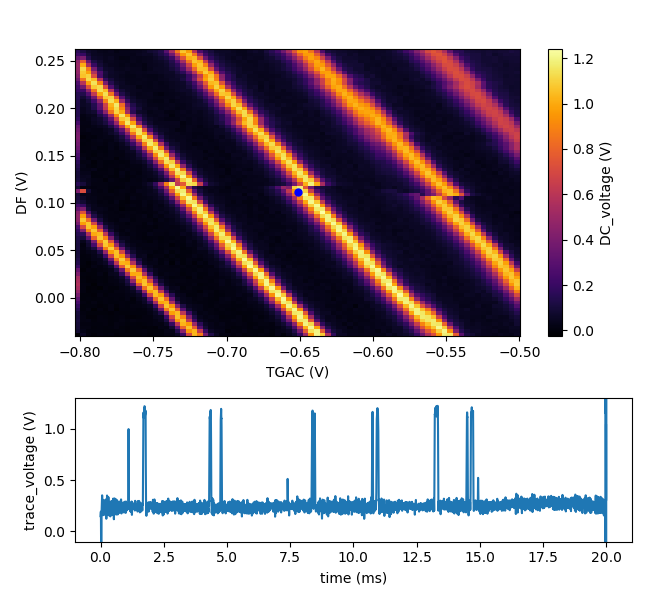

In [12]:
plot = DCSweepPlot(DC_sweep_parameter, auto_start=True, interval=0.1)

In [11]:
print(f' update_idx: {plot.update_idx} update_interval: {plot.update_interval}')

 update_idx: 613 update_interval: 0.9612614379988776


## Analyse single trace

In [ ]:
from silq.analysis.analysis import *
traces = DC_sweep_parameter.data['trace']['output']
result = find_high_low(traces, threshold_method='6*std_low')
low, high = result['low'], result['high']
high.pop('traces')
low.pop('traces')
print(f'High: {high}')
print(f'Low: {low}')
SNR = result['voltage_difference'] / np.sqrt(high['std'] ** 2 + low['std'] ** 2)
print(f'SNR: {SNR}, threshold_voltage: {result["threshold_voltage"]}')

In [32]:
import importlib
importlib.reload(plot_tools)
from silq.tools.plot_tools import *

<IPython.core.display.Javascript object>


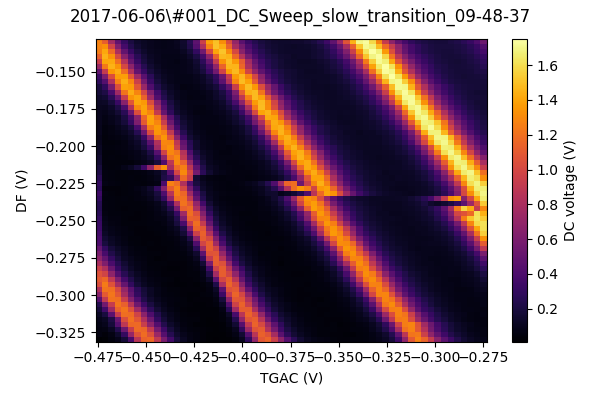

In [33]:
data = load_data(r'2017-06-06\#001_DC_Sweep_slow_transition_09-48-37')
plot = DCPlot(data)

In [ ]:
traces = DC_sweep_parameter.data['trace']['output'][:5000]
traces_diff = np.diff(traces)

fig, axes = plt.subplots(2)
axes[0].plot(traces)
axes[1].plot(traces_diff)

In [24]:
x=.123
f'{x:2.2}'

'0.12'

# Calibration

These measurements perform an EPR calibration sequence.
This can be used to find the optimal tuning position with the best contrast.
In particular, the 2D scan scans a region and shows where the best contrast is.
Note that you can also run `retune_parameter`, which automatically performs 2D scans and tunes to the best position.

## Single scan

In [36]:
EPR_parameter.single_settings(silent=False, samples=200, save_traces=True)
data = Measure(EPR_parameter).run(name='single_EPR')

contrast: 0.190
dark_counts: 0.010
voltage_difference: 0.835
fidelity_empty: 1.000
fidelity_load: 1.000
DataSet:
   data = load_data('2017-06-07/#006_single_EPR_13-46-54')
   <Type>   | <array_id>         | <array.name>       | <array.shape>
   Setpoint | single_set         | single             | (1,)
   Measured | contrast           | contrast           | (1,)
   Measured | dark_counts        | dark_counts        | (1,)
   Measured | voltage_difference | voltage_difference | (1,)
   Measured | fidelity_empty     | fidelity_empty     | (1,)
   Measured | fidelity_load      | fidelity_load      | (1,)
acquired at 2017-06-07 13:47:13


In [8]:
retune_parameter()

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


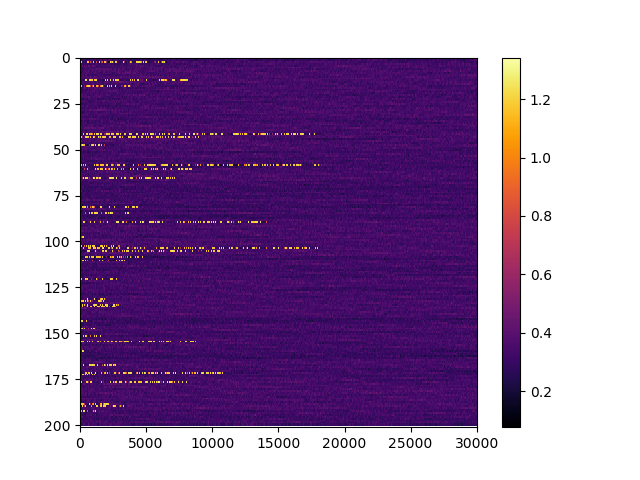

In [37]:
plot_traces(EPR_parameter.data['read_long']['output'])

## Continuous scan

In [ ]:
# Scan with long and short contrast
EPR_plunge_duration = parameters.AttributeParameter(EPR_parameter.pulse_sequence['plunge'], 'duration')
vals = [5, 200]

EPR_parameter.temporary_settings(samples=500)
loop = Loop(dummy_parameter[0:30:1]).loop(
    EPR_plunge_duration[vals]).each(
        EPR_parameter)
data = loop.get_data_set(name='EPR_continuous')
# loop.plot(data.contrast)
loop.run()


False


<IPython.core.display.Javascript object>


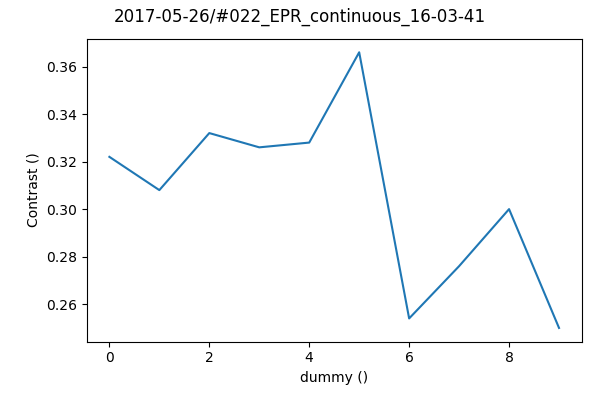

DataSet:
   data = load_data('2017-05-26/#022_EPR_continuous_16-03-41')
   <Type>   | <array_id>         | <array.name>       | <array.shape>
   Setpoint | dummy_set          | dummy              | (10,)
   Measured | contrast           | contrast           | (10,)
   Measured | dark_counts        | dark_counts        | (10,)
   Measured | voltage_difference | voltage_difference | (10,)
   Measured | fidelity_empty     | fidelity_empty     | (10,)
   Measured | fidelity_load      | fidelity_load      | (10,)
Started at 2017-05-26 16:03:42
Finished at 2017-05-26 16:05:11
 

In [25]:
layout.stop()
EPR_parameter.clear_settings()
print(EPR_parameter.continuous)

loop = Loop(dummy_parameter[0:10:1]).each(EPR_parameter)
data = loop.get_data_set(name='EPR_continuous')
loop.plot(data.contrast)
%prun loop.run()


## 2D scan

In [18]:
# Calculate gate values depending on current positions
y_sweep,x_sweep = create_set_vals(2, step_percentage=10, points=7)

In [ ]:
EPR_parameter.samples=250
EPR_parameter.temporary_settings(continuous=True)
EPR_parameter.setup()
loop = Loop(
    y_sweep).loop(
        x_sweep).each(
            EPR_parameter)

data =  loop.get_data_set(name='EPR_calibration')

loop[0].plot(data.contrast, data.dark_counts, data.voltage_difference, figsize=(9.5, 3))
loop.run();

layout.stop()
EPR_parameter.clear_settings()

# Adiabatic sweeping

In [6]:
adiabatic_ESR_parameter.t_skip = 0.0
adiabatic_ESR_parameter.t_read = 0.8

## Single scan

In [ ]:
adiabatic_ESR_parameter.pulse_sequence['empty'].enabled=True
pulses = ['empty', 'plunge', 'read_long', 'final']
durations = [0.25, 1, 10, 0.25]

adiabatic_ESR_parameter.pulse_sequence['empty'].enabled=False
pulses = ['plunge', 'read_long', 'final']
durations = [0.3, 10, 0.25]

t = 0
for duration, pulse in zip(durations, pulses):
    adiabatic_ESR_parameter.pulse_sequence[pulse].t_start = t
    adiabatic_ESR_parameter.pulse_sequence[pulse].duration = duration
    t += duration
    
adiabatic_ESR_parameter.pulse_sequence.sort()
adiabatic_ESR_parameter.pulse_sequence

In [ ]:
adiabatic_ESR_parameter.single_settings(samples=200, continuous=False, silent=False)
adiabatic_ESR_parameter()

fig, axes = plt.subplots(1, 2, figsize=(10,3))
plot_traces(adiabatic_ESR_parameter.data['read_long']['output'], ax=axes[0])
plot_traces(adiabatic_ESR_parameter.data['read_long']['output'] > 0.24, ax=axes[1])

## Center frequency scan

In [245]:
adiabatic_freq_parameter = parameters.AttributeParameter(
    adiabatic_ESR_parameter.pulse_sequence['adiabatic_ESR'], 'frequency')
adiabatic_freq_parameter(41e9)

In [246]:
vals = adiabatic_freq_parameter.sweep(39.075e9, 39.4e9, step=0.5e6)
# vals = keysight.frequency.sweep(39.05e9, 39.4e9, step=0.5e6)
print(f'Sweep vals: {len(vals)}')

Sweep vals: 651


In [247]:
adiabatic_ESR_parameter.pulse_sequence['adiabatic_ESR'].frequency_deviation = 2e6
adiabatic_ESR_parameter.pulse_sequence['adiabatic_ESR'].power = 0
adiabatic_ESR_parameter.pulse_sequence['adiabatic_ESR'].t_start = 0.4
adiabatic_ESR_parameter.pulse_sequence['adiabatic_ESR'].duration = 0.2

adiabatic_ESR_parameter.pulse_sequence['plunge'].duration = 2

adiabatic_ESR_parameter.pulse_sequence['final'].t_start = 12
adiabatic_ESR_parameter.pulse_sequence.sort()
adiabatic_ESR_parameter.pulse_sequence

PulseSequence with 4 pulses, duration: 12.25
	DCPulse(plunge, A=0.01, t_start=0, t_stop=2)
	FrequencyRampPulse(adiabatic_ESR, frequency=41000.00 MHz, frequency_deviation=2.00, power=0, t_start=0.4, t_stop=0.6)
	DCPulse(read_long, A=0, t_start=2, t_stop=12)
	DCPulse(final, A=0, t_start=12, t_stop=12.25)

<IPython.core.display.Javascript object>


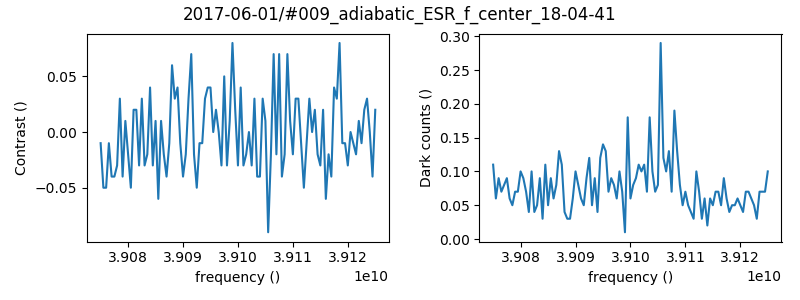

DataSet:
   data = load_data('2017-06-01/#009_adiabatic_ESR_f_center_18-04-41')
   <Type>   | <array_id>             | <array.name>           | <array.shape>
   Setpoint | frequency_set          | frequency              | (651,)
   Setpoint | index0_set             | index0                 | (651, 2)
   Measured | retune_parameter_msmts | retune_parameter_msmts | (651,)
   Measured | optimal_set_vals       | optimal_set_vals       | (651, 2)
   Measured | EPR_acquisition        | EPR_acquisition        | (651,)
   Measured | contrast               | contrast               | (651,)
   Measured | dark_counts            | dark_counts            | (651,)
   Measured | voltage_difference     | voltage_difference     | (651,)
Started at 2017-06-01 18:04:43
Finished at 2017-06-01 18:33:04


KeyboardInterrupt: 

In [21]:
adiabatic_ESR_parameter.samples = 100
EPR_parameter.samples = 250
# adiabatic_ESR_parameter.temporary_settings(continuous=True)
# adiabatic_ESR_parameter.setup(start=True)
loop = Loop(
    vals, delay=0.1).each(
        retune_parameter,
        adiabatic_ESR_parameter)
data = loop.get_data_set(name='adiabatic_ESR_f_center')
loop.plot(data.contrast, data.dark_counts, figsize=(8,3))

loop.run()

# layout.stop()
# adiabatic_ESR_parameter.clear_settings()

# T1

In [22]:
# Calculate T1 durations (shuffled)
T1_wait_times = list(np.logspace(0.1, 3.5, num=12, base=10))[:-1]
# np.random.shuffle(T1_wait_times)
print('Shuffled T1 wait times: {}'.format(T1_wait_times))

Shuffled T1 wait times: [1.2589254117941673, 2.5650209056800453, 5.2261493690870005, 10.648114862349344, 21.695198914988655, 44.203284998850606, 90.062802021127865, 183.50012466511902, 373.87572889654302, 761.76003102461243, 1552.0620891311994]


In [13]:
T1_duration_parameter = parameters.AttributeParameter(T1_parameter.pulse_sequence['plunge'], 'duration')

T1_parameter.t_skip = 0

T1_duration_parameter(20)

T1_parameter.readout_threshold_voltage=0.4

T1_parameter.pulse_sequence

PulseSequence with 4 pulses, duration: 22.25
	DCPulse(empty, A=-0.01, t_start=0, t_stop=1)
	DCPulse(plunge, A=0.01, t_start=1, t_stop=21)
	DCPulse(read, A=0, t_start=21, t_stop=22)
	DCPulse(final, A=0, t_start=22, t_stop=22.25)

<IPython.core.display.Javascript object>


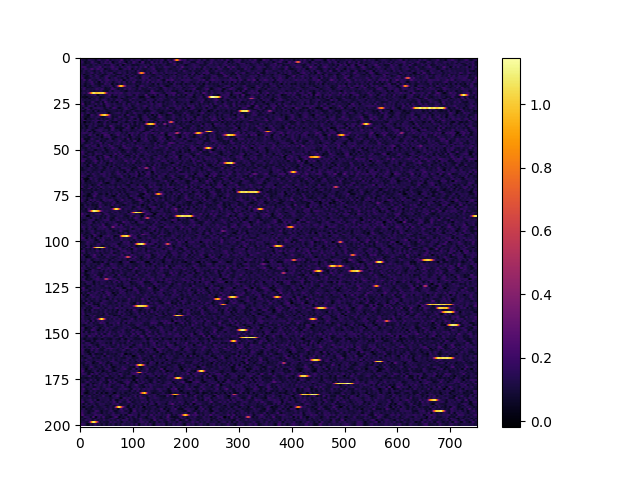

In [38]:
plot_traces(T1_parameter.data['read']['output'])

In [ ]:
T1_duration_parameter(3000)
%time T1_parameter()

In [ ]:
T1_parameter.samples = 20
EPR_parameter.samples = 250
data = qc.Loop(
    dummy_parameter[0:80:1]).each(
        retune_parameter,
        qc.Loop(T1_duration_parameter[T1_wait_times]).each(
            T1_parameter)).run(name='T1_data', progress_interval=True)

# Optimal t_read

In [28]:
from silq.analysis.analysis import *
def optimal_t_read(traces, sample_rate, start_idx=0):
    dt = 1/sample_rate
    t_list = np.linspace(0, (traces.shape[1]-1)*dt, traces.shape[1])
    t_total = t_list[-1]
    
    t_read_percentages = np.arange(1, 30)
    contrast = np.zeros(len(t_read_percentages))
    t_read_arr = np.zeros(len(t_read_percentages))
    for k, t_read_perc in enumerate(t_read_percentages):
        t_read_arr[k] = t_read_perc / 100 * t_total
        read_pts = int(len(t_list) / 100 * t_read_perc)
        
        read_high_low = find_high_low(traces,
                                      threshold_method='config')
        threshold_voltage = read_high_low['threshold_voltage']
        voltage_difference = read_high_low['voltage_difference']

        read_segment1 = traces[:, :read_pts]
        read_segment2 = traces[:, -read_pts:]

        results1 = analyse_read(read_segment1, start_idx=start_idx,
                                threshold_voltage=threshold_voltage,
                                filter_loaded=True)
        up_proportion = results1['up_proportion']
        dark_counts = analyse_read(read_segment2, start_idx=start_idx,
                                   threshold_voltage=threshold_voltage,
                                   filter_loaded=False)['up_proportion']
        contrast[k] = up_proportion - dark_counts
    return t_read_arr*1e3, contrast

<IPython.core.display.Javascript object>


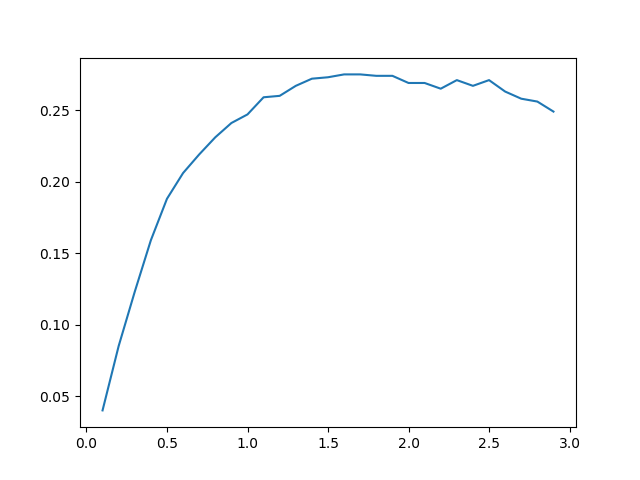

In [29]:
EPR_parameter.single_settings(samples=1000)
EPR_parameter()
t_read_arr, contrast = optimal_t_read(EPR_parameter.data['read_long']['output'], 500e3)

plt.figure()
plt.plot(t_read_arr, contrast)

# Batch measurements

In [ ]:
EPR_parameter.samples = 500
loop = Loop(dummy_parameter[0:5000:1]).each(
    retune_parameter)
loop.run(name='continuous_retune')

In [26]:
# Calculate gate values depending on current positions
y_sweep,x_sweep = create_set_vals(2, step_percentage=10, points=13)

big_loop = Loop(
    y_sweep).loop(
        x_sweep).each(
            EPR_parameter)

# Calculate gate values depending on current positions
y_sweep,x_sweep = create_set_vals(2, step_percentage=10, points=5)

fine_loop = Loop(
    y_sweep).loop(
        x_sweep).each(
            EPR_parameter)

In [27]:
EPR_parameter.samples=500
EPR_parameter.temporary_settings(continuous=False)
# EPR_parameter.setup()
loop = Loop(dummy_parameter[0:300:1]).each(
    Loop(dummy_parameter[0:10:1]).each(
        fine_loop,
        big_loop),
    Loop(dummy_parameter[0:10:1]).each(
        qc.Wait(180),
        fine_loop,
        big_loop),
    qc.Wait(3600))
data =  loop.get_data_set(name='EPR_batch')

# loop[0].plot(data.contrast, data.dark_counts, data.voltage_difference, figsize=(9.5, 3))
loop.run();

layout.stop()
EPR_parameter.clear_settings()

DataSet:
   data = load_data('2017-05-29/#001_EPR_batch_09-25-14')
   <Type>   | <array_id>                   | <array.name>       | <array.shape>
   Setpoint | dummy_set                    | dummy              | (300,)
   Setpoint | dummy_set_0                  | dummy              | (300, 10)
   Setpoint | TGAC_set_0_0                 | TGAC               | (300, 10, 5)
   Setpoint | DF_set_0_0_0                 | DF                 | (300, 10, 5, 5)
   Measured | contrast_0_0_0_0_0           | contrast           | (300, 10, 5, 5)
   Measured | dark_counts_0_0_0_0_1        | dark_counts        | (300, 10, 5, 5)
   Measured | voltage_difference_0_0_0_0_2 | voltage_difference | (300, 10, 5, 5)
   Measured | fidelity_empty_0_0_0_0_3     | fidelity_empty     | (300, 10, 5, 5)
   Measured | fidelity_load_0_0_0_0_4      | fidelity_load      | (300, 10, 5, 5)
   Setpoint | TGAC_set_0_1                 | TGAC               | (300, 10, 13)
   Setpoint | DF_set_0_1_0                 | DF      

KeyboardInterrupt: 

# Testing

In [12]:
import matplotlib as mpl
from qcodes.plots.qcmatplotlib import MatPlot
from silq.tools.notebook_tools import *
import pyperclip
from time import time
import numpy as np
import logging

from qcodes.station import Station

logger = logging.getLogger(__name__)

set_gates_txt = """\
{x_label}({x_val:.5f})
{y_label}({y_val:.5g})"""
measure_single_txt = """\
{param}_parameter.single_settings(samples={samples_measure}, silent=False)
qc.Measure({param}_parameter).run(name="{param}_measure", quiet=True)"""


class PlotAction:
    key = None
    action_keys = []

    def __init__(self, plot, key=None):
        if key is not None:
            self.key = key
        self.plot = plot

    def txt_to_clipboard(self, txt):
        pyperclip.copy(txt)

    def key_press(self, event):
        self.plot.copy = (event.key[:4] == 'ctrl')
        self.plot.execute = (event.key[-1].isupper())

    def button_press(self, event):
        if self.plot.copy:
            self.txt_to_clipboard(self.txt)
        else:
            create_cell(self.txt, execute=self.plot.execute, location='below')


class SetGates(PlotAction):
    key = 'alt+g'

    def __init__(self, plot, key=None):
        super().__init__(plot=plot, key=key)

    def key_press(self, event):
        super().key_press(event)

    def button_press(self, event):
        self.txt = set_gates_txt.format(x_label=self.plot.x_label,
                                        y_label=self.plot.y_label,
                                        x_val=event.xdata, y_val=event.ydata)
        super().button_press(event)


class MeasureSingle(PlotAction):
    key = 'alt+s'

    def __init__(self, plot, key=None):
        super().__init__(plot=plot, key=key)

    def key_press(self, event):
        super().key_press(event)

    def button_press(self, event):
        txt = set_gates_txt + '\n\n' + measure_single_txt
        self.txt = txt.format(x_label=self.plot.x_label,
                              y_label=self.plot.y_label,
                              x_val=event.xdata, y_val=event.ydata,
                              param=self.plot.measure_parameter,
                              samples_measure=self.plot.samples_measure)
        super().button_press(event)


class MoveGates(PlotAction):
    key = 'alt+m'
    action_keys = ['alt+' + key for key in
                   ['up', 'down', 'left', 'right', '-', '+', '=']]
    def __init__(self, plot, key=None):
        self.delta = 0.001
        super().__init__(plot=plot, key=key)

    def key_press(self, event):
        if event.key == self.key:
            self.point = self.plot[0].plot(self.plot.x_gate(),
                                           self.plot.y_gate(), 'or', )[0]
        elif event.key in ['alt+up', 'alt+down']:
            val = self.plot.y_gate()
            delta = self.delta * (1 if event.key == 'alt+up' else -1)
            self.plot.y_gate(val + delta)
            self.point.set_ydata(val + delta)
        elif event.key in ['alt+left', 'alt+right']:
            val = self.plot.x_gate()
            delta = self.delta * (1 if event.key == 'alt+right' else -1)
            self.plot.x_gate(val + delta)
            self.point.set_xdata(val + delta)
        elif event.key in ['alt++', 'alt+=']:
            self.delta /= 1.5
        elif event.key == 'alt+-':
            self.delta *= 1.5

    def button_press(self, event):
        self.plot.txt += '\nreceived'
        try:
            if event.guiEvent['altKey']:
                logger.info(f'Moving to gates ({event.xdata}, {event.ydata})')
                self.plot.txt += ' alt'
                self.plot.x_gate(event.xdata)
                self.point.set_xdata(event.xdata)
                self.plot.y_gate(event.ydata)
                self.point.set_ydata(event.ydata)
            else:
                logger.info('Not moving gates')
        except Exception as e:
            logger.critical(f'Error {e}')


class InteractivePlot(MatPlot):
    def __init__(self, subplots, dataset=None, figsize=None,
                 nticks=6, timeout=60, **kwargs):
        super().__init__(subplots=subplots, figsize=figsize,
                         **kwargs)
        self.station = Station.default

        if hasattr(self.station, 'layout'):
            self.layout = self.station.layout
        self.timeout = timeout
        self.cid = {}

        self.nticks = nticks
        self.t_previous = None
        self.last_key = None
        self.last_action = None
        self.copy = False
        self.execute = False

        if dataset:
            self.load_dataset(dataset)

        self._event_key = None
        self._event_button = None

        self.connect_event('key_press_event', self.handle_key_press)
        self.connect_event('button_press_event', self.handle_button_press)

    @property
    def t_elapsed(self):
        if self.t_previous is None:
            return self.timeout + 1
        else:
            return time() - self.t_previous

    @property
    def action_keys(self):
        return {action.key: action for action in self.actions}

    def load_dataset(self, dataset):
        self.dataset = dataset

        if hasattr(self, 'key'):
            self.x_label = getattr(self.dataset, self.key).set_arrays[1].name
            self.y_label = getattr(self.dataset, self.key).set_arrays[0].name

            if hasattr(self.station, self.x_label):
                self.x_gate = getattr(self.station, self.x_label)
            if hasattr(self.station, self.x_label):
                self.y_gate = getattr(self.station, self.y_label)

    def get_action(self, key=None):
        if key is None:
            action = self.last_action
            if self.last_action is not None and self.t_elapsed < self.timeout:
                return self.last_action
            else:
                return None

        # Ignore shift
        key = key.lower()

        if key[:4] == 'ctrl':
            # Ignore ctrl
            key = key[5:]

        if key in self.action_keys:
            return self.action_keys[key]
        else:
            return None

    def connect_event(self, event, action):
        if event in self.cid:
            self.fig.canvas.mpl_disconnect(self.cid[event])

        cid = self.fig.canvas.mpl_connect(event, action)
        self.cid[event] = cid

    def handle_key_press(self, event):
        self._event_key = event
        if self.get_action(event.key) is not None:
            self.t_previous = time()
            self.last_key = event.key
            action = self.get_action(event.key)
            logger.info(f'Enabling action {action} with key {event.key}')
            action.key_press(event)
            self.last_action = action
        elif self.last_action is not None \
                and event.key in self.last_action.action_keys:

            logger.info(f'Using last action {self.last_action} '
                        f'with key {event.key}')
            self.t_previous = time()
            self.last_action.key_press(event)
        else:
            pass

    def handle_button_press(self, event):
        self._event_button = event
        self.txt = f'x:{plot._event_button.xdata}, y:{plot._event_button.ydata}, alt: {plot._event_button.guiEvent["altKey"]}'
        action = self.get_action()
        if action is not None:
            self.t_previous = time()
            self.txt += '\nSent'
            action.button_press(event)

    def plot_data(self, **kwargs):
        raise NotImplementedError(
            'plot_data should be implemented in a subclass')


class Interactive3DPlot(InteractivePlot):
    def __init__(self, data_array, **kwargs):

        self.data_array = data_array
        self.x_set_array = self.data_array.set_arrays[2]
        self.y_set_array = self.data_array.set_arrays[1]
        self.z_set_array = self.data_array.set_arrays[0]

        self.plot_idx = 0

        super().__init__(subplots=1, dataset=data_array.data_set, **kwargs)
        self.add(self.data_array[self.plot_idx], **self.plot_kwargs)

        # Add slider
        self.sliderax = self.fig.add_axes([0.2, 0.01, 0.6, 0.07],
                                          facecolor='yellow')
        self.slider = mpl.widgets.Slider(self.sliderax,
                                         self.z_set_array.name,
                                         self.z_set_array[0],
                                         self.z_set_array[-1],
                                         valinit=self.z_set_array[0])
        self.slider.on_changed(self.update_slider)
        self.slider.drawon = False

    @property
    def plot_kwargs(self):
        return {'x': self.x_set_array[self.plot_idx,0],
                'y': self.y_set_array[self.plot_idx],
                'xlabel': self.x_set_array.name,
                'ylabel': self.y_set_array.name,
                'xunit': self.x_set_array.unit,
                'yunit': self.y_set_array.unit}

    def update_slider(self, value):
        self.plot_idx = np.argmin(abs(self.z_set_array.ndarray - value))
        value = self.z_set_array[self.plot_idx]
        self.slider.valtext.set_text(f'{self.z_set_array.name}: {value}')

        self[0].clear()
        self[0].add(self.data_array[self.plot_idx], **self.plot_kwargs)
        self.update()


class CalibrationPlot(InteractivePlot):
    measure_parameter = 'adiabatic_ESR'
    samples_measure =200
    samples_scan = 100

    def __init__(self, dataset, **kwargs):
        subplots = 3 if 'voltage_difference' in dataset.arrays else 2
        self.key = 'contrast'
        super().__init__(subplots=subplots, dataset=dataset, **kwargs)

        self.plot_data(nticks=self.nticks)

        self.actions = [SetGates(self), MeasureSingle(self), MoveGates(self)]

    def plot_data(self, nticks=6):
        self.add(self.dataset.contrast, subplot=0, nticks=nticks)
        self.add(self.dataset.dark_counts, subplot=1, nticks=nticks)
        if 'voltage_difference' in self.dataset.arrays:
            self.add(self.dataset.voltage_difference, subplot=2, nticks=nticks)


class DCPlot(InteractivePlot):
    def __init__(self, dataset,  **kwargs):
        self.key = 'DC_voltage'
        super().__init__(dataset=dataset, subplots=1, **kwargs)

        self.plot_data(nticks=self.nticks)

        self.actions = [SetGates(self), MoveGates(self)]

    def plot_data(self, nticks=6):
        self.add(self.dataset.DC_voltage)


class ScanningPlot(InteractivePlot):
    def __init__(self, parameter, interval=0.01, auto_start=False, **kwargs):
        super().__init__(**kwargs)
        self.timer = self.fig.canvas.new_timer(interval=interval * 1000)
        self.timer.add_callback(self.scan)
        self.connect_event('close_event', self.stop)

        self.parameter = parameter

        self.parameter.continuous = auto_start
        if auto_start:
            self.parameter.setup(start=False)
        self.scan(initialize=True, start=True,
                  stop=(not auto_start))

        if auto_start:
            # Already started during acquire
            self.start(setup=False, start=False)

    @property
    def interval(self):
        return self.timer.interval / 1000

    @interval.setter
    def interval(self, interval):
        if hasattr(self, 'timer'):
            self.timer.interval = interval * 1000

    def start(self, setup=True, start=True):
        if setup:
            self.parameter.setup(start=start)
        self.timer.start()

    def stop(self, *args):
        # *args are needed for if it is a callback
        logger.debug('Stopped')
        self.timer.stop()
        self.layout.stop()
        self.parameter.continuous = False

    def scan(self, initialize=False, start=False, stop=False):
        from winsound import Beep
        self.results = self.parameter.acquire(start=start, stop=stop)
        self.update_plot(initialize=initialize)


class DCSweepPlot(ScanningPlot):
    gate_mapping = {}
    def __init__(self, parameter, gate_mapping=None, **kwargs):
        if gate_mapping is not None:
            self.gate_mapping = gate_mapping

        if parameter.trace_pulse.enabled:
            subplots = (2, 1)
        else:
            subplots = 1
        super().__init__(parameter, subplots=subplots, **kwargs)

        if parameter.trace_pulse.enabled:
            self[1].set_ylim(-0.1, 1.3)

        self.actions = [MoveGates(self)]

    def update_plot(self, initialize=False):
        for k, result in enumerate(self.results):
            if initialize:

                setpoints = self.parameter.setpoints[k]
                setpoint_names = self.parameter.setpoint_names[k]
                setpoint_units = self.parameter.setpoint_units[k]
                name = self.parameter.names[k]
                unit = self.parameter.units[k]
                if len(setpoints) == 2:
                    self[k].add(result, x=setpoints[1], y=setpoints[0],
                                xlabel=setpoint_names[1],
                                ylabel=setpoint_names[0],
                                xunit=setpoint_units[1],
                                yunit=setpoint_units[0],
                                zlabel=name,
                                zunit=unit)
                    self.x_label = self.gate_mapping.get(setpoint_names[1],
                                                         setpoint_names[1])
                    self.y_label = self.gate_mapping.get(setpoint_names[0],
                                                         setpoint_names[0])

                    if hasattr(self.station, self.x_label) and \
                            hasattr(self.station, self.y_label):
                        self.x_gate = getattr(self.station, self.x_label)
                        self.y_gate = getattr(self.station, self.y_label)

                        self[k].plot([self.x_gate.get_latest()],
                                     [self.y_gate.get_latest()], 'ob', ms=5)
                else:
                    self[k].add(result, x=setpoints[0],
                                xlabel=setpoint_names[0],
                                ylabel=name,
                                xunit=setpoint_units[0],
                                yunit=unit)

            else:
                result_config = self.traces[k]['config']
                if 'z' in result_config:
                    result_config['z'] = result
                else:
                    result_config['y'] = result
        super().update_plot()

# Notes

To view a self-updating DC plot, go to `Live DC scan -> Scan` and run the first line.

To tune to a good transition, create a cell and type: `retune_parameter()`.
If the tuning is successful, the last value returned is not None.
If it is None, the tuning failed.
Note that you must already be roughly tuned to a transition.

